In [1]:
# Important packages
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Parameters
dt = 0.5  # timestep (in seconds), represents max frequency
num_epochs = 20  # number of epochs
num_class = 10  # number of classes
num_images = num_class * 600  # number of images in training/testing set
tau = 0.01
tau_LI = 0.1
RC = 10
f = 0.1 # fraction dt_sp/dt
beta = 0.5  # nudge factor
nu = 3e-5  # learning rate
gamma = 50  # timesteps to delay
L_filt = 10  # timesteps to be filtered
v_rst = 0  # reset voltage
v_th = 1  # threshold voltage
T_free = 150  # free phase timesteps
T_nudge = 200  # nudge phase timesteps
N_input = 784  # number input neurons
N_hidden = 10  # number hidden neurons
N_output = num_class  # number output neurons
ternary = True # ternary gradients?

In [3]:
# # Prep data (ONLY RUN IF NOT ALREADY SAVED)
# train_images = open('./mnist/train-images.idx3-ubyte',mode='rb')
# train_labels = open('./mnist/train-labels.idx1-ubyte',mode='rb')
# test_images = open('./mnist/t10k-images.idx3-ubyte',mode='rb')
# test_labels = open('./mnist/t10k-labels.idx1-ubyte',mode='rb')

# train_images.read(4)
# train_labels.read(4)
# test_images.read(4)
# test_labels.read(4)

# num_train_images = unpack('>I',train_images.read(4))[0]
# num_train_labels = unpack('>I',train_labels.read(4))[0]
# train_rows = unpack('>I',train_images.read(4))[0]
# train_cols = unpack('>I',train_images.read(4))[0]
# num_test_images = unpack('>I',test_images.read(4))[0]
# num_test_labels = unpack('>I',test_labels.read(4))[0]
# test_rows = unpack('>I',test_images.read(4))[0]
# test_cols = unpack('>I',test_images.read(4))[0]

# tr_images = np.zeros((num_train_images,train_rows,train_cols),dtype=np.uint8)
# tr_labels = np.zeros((num_train_labels,1),dtype=np.uint8)
# te_images = np.zeros((num_test_images,test_rows,test_cols),dtype=np.uint8)
# te_labels = np.zeros((num_test_labels,1),dtype=np.uint8)

# for i in range(num_train_images):
#     tr_labels[i] = unpack('>B',train_labels.read(1))[0]
#     for j in range(train_rows):
#         for k in range(train_cols):
#             tr_images[i][j][k] = unpack('>B',train_images.read(1))[0]
            
# for i in range(num_test_images):
#     te_labels[i] = unpack('>B',test_labels.read(1))[0]
#     for j in range(test_rows):
#         for k in range(test_cols):
#             te_images[i][j][k] = unpack('>B',test_images.read(1))[0]
            
# np.save('./mnist/train_images.npy',tr_images)
# np.save('./mnist/train_labels.npy',tr_labels)
# np.save('./mnist/test_images.npy',te_images)
# np.save('./mnist/test_labels.npy',te_labels)

In [4]:
# Generate spiking inputs

# Load and flatten
train_images = np.load('./mnist/train_images.npy')
train_labels = np.load('./mnist/train_labels.npy')
test_images = np.load('./mnist/test_images.npy')
test_labels = np.load('./mnist/test_labels.npy')

train_images = np.reshape(train_images,(60000,784))
test_images = np.reshape(test_images,(10000,784))

# Take subsets of each
count0 = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
count8 = 0
count9 = 0
train_images_sub = np.zeros((num_images,784))
train_labels_sub = np.zeros((num_images,1))

for i in range(60000):
    if train_labels[i] == 0:
        if count0 < 600:
            train_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_images[i]
            train_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_labels[i]
            count0 += 1
    if train_labels[i] == 1:
        if count1 < 600:
            train_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_images[i]
            train_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_labels[i]
            count1 += 1
    if train_labels[i] == 2:
        if count2 < 600:
            train_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_images[i]
            train_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_labels[i]
            count2 += 1
    if train_labels[i] == 3:
        if count3 < 600:
            train_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_images[i]
            train_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_labels[i]
            count3 += 1
    if train_labels[i] == 4:
        if count4 < 600:
            train_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_images[i]
            train_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_labels[i]
            count4 += 1
    if train_labels[i] == 5:
        if count5 < 600:
            train_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_images[i]
            train_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_labels[i]
            count5 += 1
    if train_labels[i] == 6:
        if count6 < 600:
            train_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_images[i]
            train_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_labels[i]
            count6 += 1
    if train_labels[i] == 7:
        if count7 < 600:
            train_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_images[i]
            train_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_labels[i]
            count7 += 1
    if train_labels[i] == 8:
        if count8 < 600:
            train_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_images[i]
            train_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_labels[i]
            count8 += 1
    if train_labels[i] == 9:
        if count9 < 600:
            train_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_images[i]
            train_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = train_labels[i]
            count9 += 1
            
count0 = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
count8 = 0
count9 = 0
test_images_sub = np.zeros((num_images,784))
test_labels_sub = np.zeros((num_images,1))

for i in range(10000):
    if test_labels[i] == 0:
        if count0 < 600:
            test_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_images[i]
            test_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_labels[i]
            count0 += 1
    if test_labels[i] == 1:
        if count1 < 600:
            test_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_images[i]
            test_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_labels[i]
            count1 += 1
    if test_labels[i] == 2:
        if count2 < 600:
            test_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_images[i]
            test_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_labels[i]
            count2 += 1
    if test_labels[i] == 3:
        if count3 < 600:
            test_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_images[i]
            test_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_labels[i]
            count3 += 1
    if test_labels[i] == 4:
        if count4 < 600:
            test_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_images[i]
            test_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_labels[i]
            count4 += 1
    if test_labels[i] == 5:
        if count5 < 600:
            test_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_images[i]
            test_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_labels[i]
            count5 += 1
    if test_labels[i] == 6:
        if count6 < 600:
            test_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_images[i]
            test_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_labels[i]
            count6 += 1
    if test_labels[i] == 7:
        if count7 < 600:
            test_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_images[i]
            test_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_labels[i]
            count7 += 1
    if test_labels[i] == 8:
        if count8 < 600:
            test_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_images[i]
            test_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_labels[i]
            count8 += 1
    if test_labels[i] == 9:
        if count9 < 600:
            test_images_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_images[i]
            test_labels_sub[count0+count1+count2+count3+count4+count5+count6+count7+count8+count9] = test_labels[i]
            count9 += 1
            
train_images = train_images_sub / 510
train_labels = train_labels_sub
test_images = test_images_sub / 510
test_labels = test_labels_sub

f_max = np.zeros((1,T_free+T_nudge))
f_max[:,1::2] = 1

In [5]:
# Initial synaptic weights

# Xavier normal initialization
syn_IH = np.random.normal(0,np.sqrt(2/(N_input+N_hidden)),(N_input,N_hidden))
syn_HO = np.random.normal(0,np.sqrt(2/(N_hidden+N_output)),(N_hidden,N_output))
syn_OH = np.copy(syn_HO).T

In [6]:
# Training Code

# For each epoch
for epoch in range(num_epochs):
        
    # For each training image
    for i in tqdm(range(num_images)):
        
        # Instantiate membrane potential and spikes for this images
        v_input = np.zeros((N_input,T_free+T_nudge))
        v_hidden = np.zeros((N_hidden,T_free+T_nudge))
        v_output = np.zeros((N_output,T_free+T_nudge))
        spikes_input = np.zeros((N_input,T_free+T_nudge))
        spikes_hidden = np.zeros((N_hidden,T_free+T_nudge))
        spikes_output = np.zeros((N_output,T_free+T_nudge))
        p_input = np.zeros((N_input,T_free+T_nudge))
        p_hidden = np.zeros((N_hidden,T_free+T_nudge))
        p_output = np.zeros((N_output,T_free+T_nudge))
        p_dot_input = np.zeros((N_input,T_free+T_nudge))
        p_dot_hidden = np.zeros((N_hidden,T_free+T_nudge))
        p_dot_output = np.zeros((N_output,T_free+T_nudge))
        p_dot_input_LPF = np.zeros((N_input,T_free+T_nudge))
        p_dot_hidden_LPF = np.zeros((N_hidden,T_free+T_nudge))
        p_dot_output_LPF = np.zeros((N_output,T_free+T_nudge))
        p_target = np.zeros((N_output,T_free+T_nudge))
        
        # Generate target vectors
        target_spikes = np.zeros((N_output,T_free+T_nudge))
        target_spikes[train_labels[i].astype(int)] = f_max.copy()
        error = np.zeros((N_output,T_free+T_nudge))
        
        # For each free-phase timestep
        for t in range(T_free):
            
            # LIF of input neurons with normalized MNIST inputs
            dvdt_input = (v_rst - v_input[:,t-1]) * tau + train_images[i,:]
            v_input[:,t] = v_input[:,t-1] + dvdt_input * dt
            reset_input = v_input[:,t] > v_th
            v_input[:,t] -= np.multiply(v_input[:,t],reset_input.astype(int))
            v_input[:,t] += v_rst * reset_input.astype(int)
            spikes_input[:,t] = reset_input.astype(int)
            
            # LI of input neurons' output spikes and derivative computation
            dpdt_input = -p_input[:,t-1] * tau_LI + spikes_input[:,t]
            p_input[:,t] = p_input[:,t-1] + dpdt_input * dt
            p_dot_input[:,t] = p_input[:,t] - p_input[:,t-gamma]
            p_dot_input_LPF[:,t] = np.sum(p_dot_input[:,t-L_filt:t],axis=1) / L_filt
            
            # Find the synaptic response based on current input and previous outputs
            result_IH = np.matmul(syn_IH.T,spikes_input[:,t])
            result_HO = np.matmul(syn_HO.T,spikes_hidden[:,t-1])
            result_OH = np.matmul(syn_OH.T,spikes_output[:,t-1])
            
            # Compute error of target - output
            dpdt_target = -p_target[:,t-1] * tau_LI + target_spikes[:,t]
            p_target[:,t] = p_target[:,t-1] + dpdt_target * dt
            error[:,t] = p_target[:,t-1] - p_output[:,t-1]
            
            # LIF of hidden neurons with incoming spikes from input/output neurons
            dvdt_hidden = (v_rst - v_hidden[:,t-1]) * tau + result_IH + result_OH
            v_hidden[:,t] = v_hidden[:,t-1] + dvdt_hidden * dt
            reset_hidden = v_hidden[:,t] > v_th
            v_hidden[:,t] -= np.multiply(v_hidden[:,t],reset_hidden.astype(int))
            v_hidden[:,t] += v_rst * reset_hidden.astype(int)
            spikes_hidden[:,t] = reset_hidden.astype(int)
            
            # LI of hidden neurons' output spikes and derivative computation
            dpdt_hidden = -p_hidden[:,t-1] * tau_LI + spikes_hidden[:,t]
            p_hidden[:,t] = p_hidden[:,t-1] + dpdt_hidden * dt
            p_dot_hidden[:,t] = p_hidden[:,t] - p_hidden[:,t-gamma]
            p_dot_hidden_LPF[:,t] = np.sum(p_dot_hidden[:,t-L_filt:t],axis=1) / L_filt
            
            # LIF of output neurons with incoming spikes from hidden neurons
            dvdt_output = (v_rst - v_output[:,t-1]) * tau + result_HO
            v_output[:,t] = v_output[:,t-1] + dvdt_output * dt
            reset_output = v_output[:,t] > v_th
            v_output[:,t] -= np.multiply(v_output[:,t],reset_output.astype(int))
            v_output[:,t] += v_rst * reset_output.astype(int)
            spikes_output[:,t] = reset_output.astype(int)
            
            # LI of output neurons' output spikes
            dpdt_output = -p_output[:,t-1] * tau_LI + spikes_output[:,t]
            p_output[:,t] = p_output[:,t-1] + dpdt_output * dt
            p_dot_output[:,t] = p_output[:,t] - p_output[:,t-gamma]
            p_dot_output_LPF[:,t] = np.sum(p_dot_output[:,t-L_filt:t],axis=1) / L_filt
            
            # Make derivatives tertiary (-1, 0, or 1)
            inc_output = p_dot_output_LPF[:,t] > 0
            dec_output = p_dot_output_LPF[:,t] < 0
            inc_hidden = p_dot_hidden_LPF[:,t] > 0
            dec_hidden = p_dot_hidden_LPF[:,t] < 0
            p_dot_output_LPF[:,t] = inc_output.astype(int) - dec_output.astype(int)
            p_dot_hidden_LPF[:,t] = inc_hidden.astype(int) - dec_hidden.astype(int)
            
        # For each nudged-phase timestep 
        for t in range(T_free,T_free+T_nudge):
            
            # LIF of input neurons with normalized MNIST inputs
            dvdt_input = (v_rst - v_input[:,t-1]) * tau + train_images[i,:]
            v_input[:,t] = v_input[:,t-1] + dvdt_input * dt
            reset_input = v_input[:,t] > v_th
            v_input[:,t] -= np.multiply(v_input[:,t],reset_input.astype(int))
            v_input[:,t] += v_rst * reset_input.astype(int)
            spikes_input[:,t] = reset_input.astype(int)
            
            # LI of input neurons' output spikes and derivative computation
            dpdt_input = -p_input[:,t-1] * tau_LI + spikes_input[:,t]
            p_input[:,t] = p_input[:,t-1] + dpdt_input * dt
            p_dot_input[:,t] = p_input[:,t] - p_input[:,t-gamma]
            p_dot_input_LPF[:,t] = np.sum(p_dot_input[:,t-L_filt:t],axis=1) / L_filt
            
            # Find the synaptic response based on current input and previous outputs
            result_IH = np.matmul(syn_IH.T,spikes_input[:,t])
            result_HO = np.matmul(syn_HO.T,spikes_hidden[:,t-1])
            result_OH = np.matmul(syn_OH.T,spikes_output[:,t-1])
            
            # Compute error of target - output
            dpdt_target = -p_target[:,t-1] * tau_LI + target_spikes[:,t]
            p_target[:,t] = p_target[:,t-1] + dpdt_target * dt
            error[:,t] = p_target[:,t-1] - p_output[:,t-1]
            
            # LIF of hidden neurons with incoming spikes from input/output neurons
            dvdt_hidden = (v_rst - v_hidden[:,t-1]) * tau + result_IH + result_OH
            v_hidden[:,t] = v_hidden[:,t-1] + dvdt_hidden * dt
            reset_hidden = v_hidden[:,t] > v_th
            v_hidden[:,t] -= np.multiply(v_hidden[:,t],reset_hidden.astype(int))
            v_hidden[:,t] += v_rst * reset_hidden.astype(int)
            spikes_hidden[:,t] = reset_hidden.astype(int)
            
            # LI of hidden neurons' output spikes and derivative computation
            dpdt_hidden = -p_hidden[:,t-1] * tau_LI + spikes_hidden[:,t]
            p_hidden[:,t] = p_hidden[:,t-1] + dpdt_hidden * dt
            p_dot_hidden[:,t] = p_hidden[:,t] - p_hidden[:,t-gamma]
            p_dot_hidden_LPF[:,t] = np.sum(p_dot_hidden[:,t-L_filt:t],axis=1) / L_filt
            
            # LIF of output neurons with incoming spikes from hidden neurons
            dvdt_output = (v_rst - v_output[:,t-1]) * tau + result_HO + beta * error[:,t]
            v_output[:,t] = v_output[:,t-1] + dvdt_output * dt
            reset_output = v_output[:,t] > v_th
            v_output[:,t] -= np.multiply(v_output[:,t],reset_output.astype(int))
            v_output[:,t] += v_rst * reset_output.astype(int)
            spikes_output[:,t] = reset_output.astype(int)
            
            # LI of output neurons' output spikes and derivative computation
            dpdt_output = -p_output[:,t-1] * tau_LI + spikes_output[:,t]
            p_output[:,t] = p_output[:,t-1] + dpdt_output * dt
            p_dot_output[:,t] = p_output[:,t] - p_output[:,t-gamma]
            p_dot_output_LPF[:,t] = np.sum(p_dot_output[:,t-L_filt:t],axis=1) / L_filt
            
            # Make derivatives ternary (-1, 0, or 1)
            if ternary == True:
                inc_output = p_dot_output_LPF[:,t] > 0
                dec_output = p_dot_output_LPF[:,t] < 0
                inc_hidden = p_dot_hidden_LPF[:,t] > 0
                dec_hidden = p_dot_hidden_LPF[:,t] < 0
                p_dot_output_LPF[:,t] = inc_output.astype(int) - dec_output.astype(int)
                p_dot_hidden_LPF[:,t] = inc_hidden.astype(int) - dec_hidden.astype(int)
            
            # Update weights for synapses with post-synaptic spikes
            # Use spike data and LPF for this timestep
            syn_HO += nu*np.matmul(spikes_hidden[:,t].reshape((N_hidden,1)),p_dot_output_LPF[:,t].reshape((N_output,1)).T)
            syn_OH += nu*np.matmul(spikes_output[:,t].reshape((N_output,1)),p_dot_hidden_LPF[:,t].reshape((N_hidden,1)).T)
            syn_IH += nu*np.matmul(spikes_input[:,t].reshape((N_input,1)),p_dot_hidden_LPF[:,t].reshape((N_hidden,1)).T)


 11%|█         | 661/6000 [00:59<07:57, 11.17it/s]


KeyboardInterrupt: 

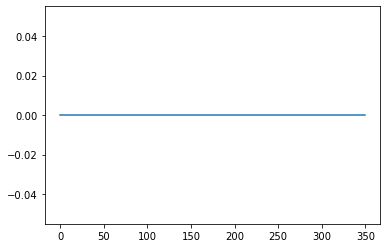

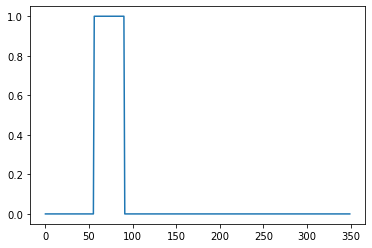

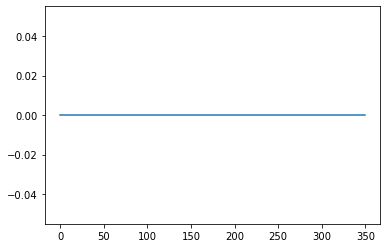

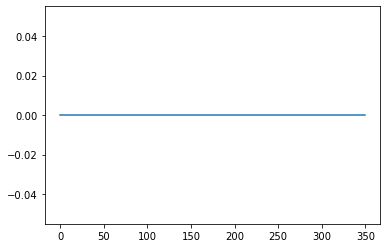

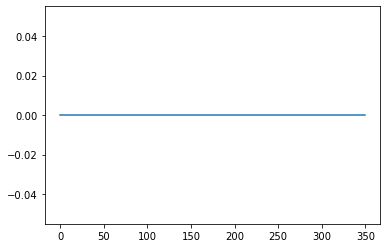

In [8]:
#plt.plot(np.arange(T_free+T_nudge),p_dot_output_LPF[0,:])
#plt.show()
#plt.plot(np.arange(T_free+T_nudge),p_dot_output_LPF[1,:])
#plt.show()
#plt.plot(np.arange(T_free+T_nudge),p_dot_output_LPF[2,:])
#plt.show()
#plt.plot(np.arange(T_free+T_nudge),p_dot_output_LPF[3,:])
#plt.show()
#plt.plot(np.arange(T_free+T_nudge),p_dot_output_LPF[4,:])
#plt.show()

In [ ]:
# Testing Code
acc = 0
guess = np.zeros((num_images,1))

# For each training image
for i in tqdm(range(num_images)):
        
    # Instantiate membrane potential and spikes for this images
    v_input = np.zeros((N_input,T_free+T_nudge))
    v_hidden = np.zeros((N_hidden,T_free+T_nudge))
    v_output = np.zeros((N_output,T_free+T_nudge))
    spikes_input = np.zeros((N_input,T_free+T_nudge))
    spikes_hidden = np.zeros((N_hidden,T_free+T_nudge))
    spikes_output = np.zeros((N_output,T_free+T_nudge))
        
    # For each free-phase timestep
    for t in range(T_free+T_nudge):
        
        # LIF of input neurons with normalized MNIST inputs
        dvdt_input = (v_rst - v_input[:,t-1]) * tau + test_images[i,:]
        v_input[:,t] = v_input[:,t-1] + dvdt_input * dt
        reset_input = v_input[:,t] > v_th
        v_input[:,t] -= np.multiply(v_input[:,t],reset_input.astype(int))
        v_input[:,t] += v_rst * reset_input.astype(int)
        spikes_input[:,t] = reset_input.astype(int)
           
        # Find the synaptic response based on current input and previous outputs
        result_IH = np.matmul(syn_IH.T,spikes_input[:,t])
        result_HO = np.matmul(syn_HO.T,spikes_hidden[:,t-1])
        result_OH = np.matmul(syn_OH.T,spikes_output[:,t-1])
            
        # LIF of hidden neurons with incoming spikes from input/output neurons
        dvdt_hidden = (v_rst - v_hidden[:,t-1]) * tau + result_IH + result_OH
        v_hidden[:,t] = v_hidden[:,t-1] + dvdt_hidden * dt
        reset_hidden = v_hidden[:,t] > v_th
        v_hidden[:,t] -= np.multiply(v_hidden[:,t],reset_hidden.astype(int))
        v_hidden[:,t] += v_rst * reset_hidden.astype(int)
        spikes_hidden[:,t] = reset_hidden.astype(int)
            
        # LIF of output neurons with incoming spikes from hidden neurons
        dvdt_output = (v_rst - v_output[:,t-1]) * tau + result_HO
        v_output[:,t] = v_output[:,t-1] + dvdt_output * dt
        reset_output = v_output[:,t] > v_th
        v_output[:,t] -= np.multiply(v_output[:,t],reset_output.astype(int))
        v_output[:,t] += v_rst * reset_output.astype(int)
        spikes_output[:,t] = reset_output.astype(int)
        
    # Calculate output neuron with highest spike-rate
    classification = np.argmax(np.sum(spikes_output,axis=1))
    guess[i] = classification
    if classification.astype(int) == test_labels[i].astype(int):
        acc += 1
        
# Calculate error-rate
acc_rate = acc / num_images * 100
print(acc_rate)

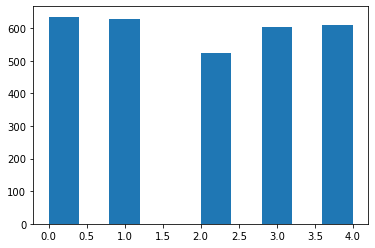

In [9]:
plt.hist(guess)
plt.show()

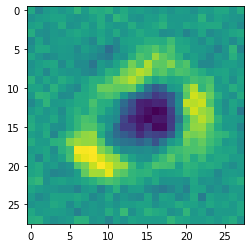

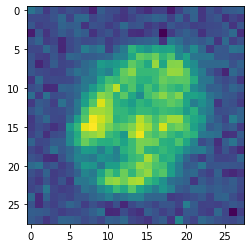

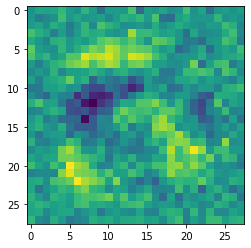

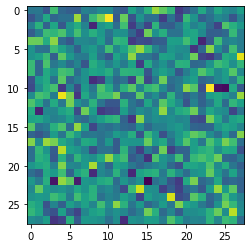

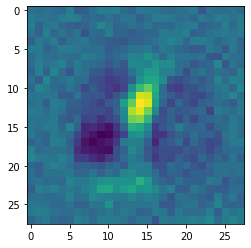

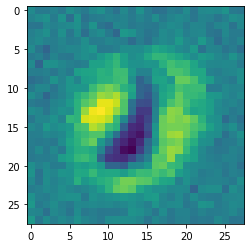

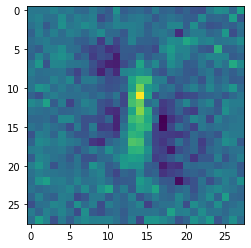

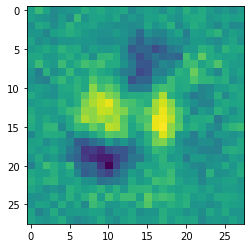

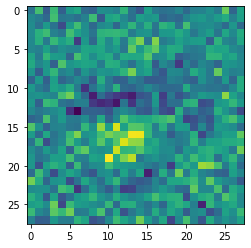

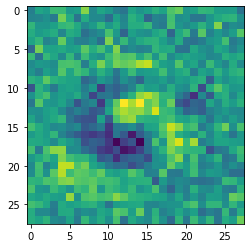

In [10]:
plt.imshow(syn_IH[:,0].reshape((28,28)))
plt.show()
plt.imshow(syn_IH[:,1].reshape((28,28)))
plt.show()
plt.imshow(syn_IH[:,2].reshape((28,28)))
plt.show()
plt.imshow(syn_IH[:,3].reshape((28,28)))
plt.show()
plt.imshow(syn_IH[:,4].reshape((28,28)))
plt.show()
plt.imshow(syn_IH[:,5].reshape((28,28)))
plt.show()
plt.imshow(syn_IH[:,6].reshape((28,28)))
plt.show()
plt.imshow(syn_IH[:,7].reshape((28,28)))
plt.show()
plt.imshow(syn_IH[:,8].reshape((28,28)))
plt.show()
plt.imshow(syn_IH[:,9].reshape((28,28)))
plt.show()